# Decision Tree
A simple decision tree built on this data will iteratively split the data along one or the
other axis according to some quantitative criterion, and at each level assign the label
of the new region according to a majority vote of points within it. 

In [32]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
import utils.helpers_05_08 as helpers_05_08
%matplotlib inline

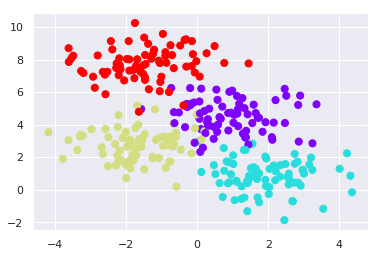

In [33]:
X, y = make_blobs(n_samples=300, centers=4,
random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [34]:
## default gini purity
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [35]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
            clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

/home/marchelo/anaconda3/envs/ml.tools/lib/python3.5/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


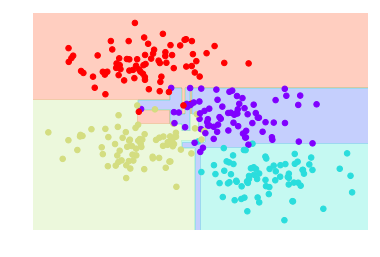

In [36]:
visualize_classifier(DecisionTreeClassifier(), X, y)

In [37]:
helpers_05_08.plot_tree_interactive(X, y);

llego aca 


interactive(children=(Dropdown(description='depth', index=1, options=(1, 5), value=5), Output()), _dom_classes…

## Random Forest for Classification
### Decision Trees ensembled by bagging
Multiple overfitting estimators can be combined to reduce the effect of this overfitting—is what underlies an ensemble method called bagging. 

__Bagging__ makes use of an ensemble (a grab bag, perhaps) of parallel estimators, each of which overfits the data, and averages the results to find a better classification. 

In bagging, first you will have to sample the input data (with replacement) to generate multiple sets of input data. For each of those sets, the same baseline predictor (such as a SVM, Neural Net, etc) is run to get a trained model for each of the training set.

Now, to do the prediction on an unseen test sample, it is run through these individual models and the predictions are now averaged to get the final decision.




/home/marchelo/anaconda3/envs/ml.tools/lib/python3.5/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


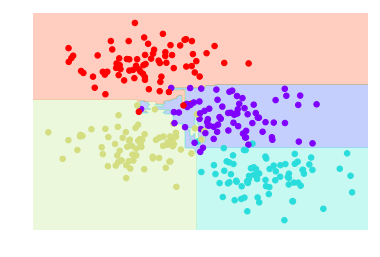

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, 
                        n_estimators=100, 
                        max_samples=0.8,
                        random_state=1)
bag.fit(X, y)
visualize_classifier(bag, X, y)

### Decision tree by random split
In practice, decision trees are more effectively randomized when some stochasticity is injected in how the splits are chosen; this way, all the data contributes to the fit each time, but the results of the fit still have the desired randomness. 

 For example, when determining which feature to split on, the randomized tree might select from among the top several features. 

/home/marchelo/anaconda3/envs/ml.tools/lib/python3.5/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


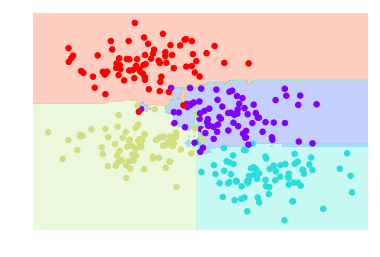

In [39]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, 
                               random_state=0)
visualize_classifier(model, X, y);

### Example - Classifying Digits

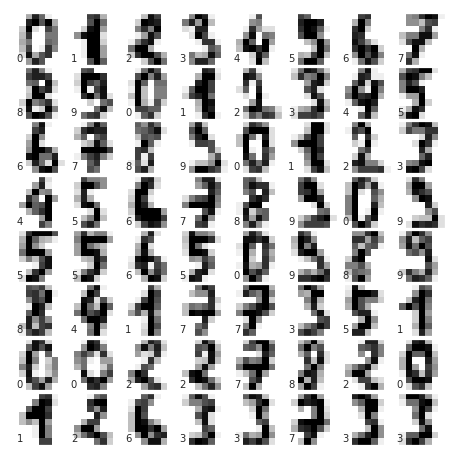

In [40]:
from sklearn.datasets import load_digits

digits = load_digits()

# set up the figure
fig = plt.figure(figsize=(6, 6)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [41]:
from sklearn.cross_validation import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=0)

model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [42]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       1.00      0.96      0.98        45
          2       0.95      1.00      0.98        42
          3       0.98      0.96      0.97        46
          4       0.97      1.00      0.99        37
          5       0.98      0.98      0.98        48
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.94      0.98      0.96        46
          9       0.96      0.98      0.97        46

avg / total       0.98      0.98      0.98       450



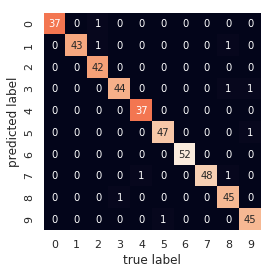

In [43]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Random Forest for Regression

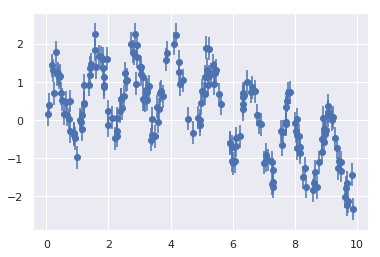

In [44]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    
    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

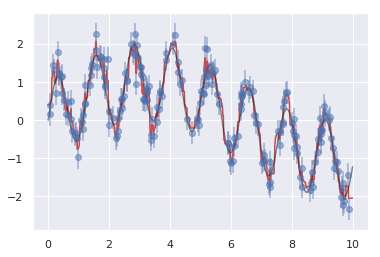

In [47]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

Here the true model is shown by the smooth curve, while the random forest model is shown by the jagged curve.

## Apendix

__True Positive__ If the alarm goes on in case of a fire it is true positive in the sense that there is a fire i.e fire is positive and prediction made by the system is true.

__True Negative__ If alarm does not go on and there was no fire, the fire is negative and this prediction was true .

<p align="center">
<img src="images/day81_DT-RF_09.jpeg" width="400">
</p>


* __Recall__: True Positive Rate: $recall = \frac{TP}{FN+TP}$
* __True Negative Rate__: $TNR = \frac{FP}{TN+FP}$
* __Precision__: $precision = \frac{TP}{FP+TP}$

### References
* Python Data Science Handbook, Jake Vanderplas
* What is baggig in machine learning?, https://www.quora.com/What-is-bagging-in-machine-learning
* Sampling With Replacement and Sampling Without Replacement https://web.ma.utexas.edu/users/parker/sampling/repl.htm
* f1 score, confusion matrix https://www.python-course.eu/confusion_matrix.php
* https://chemicalstatistician.wordpress.com/2014/05/12/applied-statistics-lesson-of-the-day-type-i-error-false-positive-and-type-2-error-false-negative/